## Introduction to SpaCy
SpaCy is one of the main libraries for NLP in Python. It is especially tailored towards the (development and) deployment of pipelines for a number of NLP tasks, from named entity recognition to dependency parsing. Recent additions to spaCy also make it possible to use advanced models (LLMs) as building block for such pipelines. 

In this notebook, we will explore some of SpaCy's basic functionality. As we will mainly focus on understanding and implementing methods to represent and generate text, we will not be using SpaCy extensively for the rest of the course -- but it is a great tool for many applications, and it has wonderful documentation.

Let's start by importing SpaCy.
You may need to install this first (I am using `spacy==3.6.1`) -- add it to your requirements file if you have one.

In [1]:
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
from collections import defaultdict
from sklearn.decomposition import PCA

/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


When spaCy is loaded, we then need to initialize a model.

NB: Models first have to be downloaded from the command line. An overview of avaiable models from spaCy can be found [here](https://spacy.io/usage/models):
```
python -m spacy download en_core_web_md
```
Note that models for a wide range of languages are available on SpaCy, feel free to experiment!

In [2]:
nlp = spacy.load("en_core_web_sm")

We first create a `spaCy` pipeline which is going to be used for all of our analysis. Essentially we feed our examples of language down the pipeline, and get annotated texts out the end. Let's load the first 10 chapters of "War and Peace", the text file we worked with last week.

In [3]:
book = open('../data/book-war-and-peace.txt').read()

In [4]:
print(book[:20])

CHAPTER I

"Well, Pr


Let's now find where chapter 10 starts, and only keep text until there.

In [7]:
chap_10_index = re.search('CHAPTER X', book).start()
book_c10 = book[:chap_10_index]
print(book_c10[:100])

CHAPTER I

"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I w


The final object that comes out of the end is known as a `spaCy` `Doc` which is essentially a list of tokens. However, rather than just being a list of strings, each of the tokens in this list have their own attributes, which can be accessed using the dot notation.

In [14]:
doc = nlp(book_c10)

The resulting `doc` parses the text in sentences and tokens within sentences.

In [15]:
for s in doc.sents:
    print(s)
    for t in s:
        print(t)

CHAPTER I

"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes.
CHAPTER
I



"
Well
,
Prince
,
so
Genoa
and
Lucca
are
now
just
family
estates
of
the


Buonapartes
.
But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by that
Antichrist--I really believe he is Antichrist--I will have nothing more
to do with you and you are no longer my friend, no longer my 'faithful
slave,' as you call yourself!
But
I
warn
you
,
if
you
do
n't
tell
me
that
this
means
war
,


if
you
still
try
to
defend
the
infamies
and
horrors
perpetrated
by
that


Antichrist
--
I
really
believe
he
is
Antichrist
--
I
will
have
nothing
more


to
do
with
you
and
you
are
no
longer
my
friend
,
no
longer
my
'
faithful


slave
,
'
as
you
call
yourself
!
But how do you do?
But
how
do
you
do
?
I see I have frightened
you--sit down and tell me all the news.
I
see
I
have
frightened


you
--
sit
down
and
tell
me
all
the
news
.
"

It wa

Each token in the doc is annotated for a number of attributes.

In [16]:
i = 0
for token in doc:
    i += 1
    print(token.text, "\t\t", token.pos_, "\t\t", token.dep_,"\t\t", token.lemma_, "\t\t")
    if i == 50:
        break

CHAPTER 		 NOUN 		 nsubj 		 chapter 		
I 		 PRON 		 nummod 		 I 		


 		 SPACE 		 dep 		 

 		
" 		 PUNCT 		 punct 		 " 		
Well 		 INTJ 		 intj 		 well 		
, 		 PUNCT 		 punct 		 , 		
Prince 		 PROPN 		 npadvmod 		 Prince 		
, 		 PUNCT 		 punct 		 , 		
so 		 ADV 		 cc 		 so 		
Genoa 		 PROPN 		 nsubj 		 Genoa 		
and 		 CCONJ 		 cc 		 and 		
Lucca 		 PROPN 		 conj 		 Lucca 		
are 		 AUX 		 ROOT 		 be 		
now 		 ADV 		 advmod 		 now 		
just 		 ADV 		 advmod 		 just 		
family 		 NOUN 		 compound 		 family 		
estates 		 NOUN 		 attr 		 estate 		
of 		 ADP 		 prep 		 of 		
the 		 DET 		 det 		 the 		

 		 SPACE 		 dep 		 
 		
Buonapartes 		 PROPN 		 pobj 		 Buonapartes 		
. 		 PUNCT 		 punct 		 . 		
But 		 CCONJ 		 cc 		 but 		
I 		 PRON 		 nsubj 		 I 		
warn 		 VERB 		 ccomp 		 warn 		
you 		 PRON 		 dobj 		 you 		
, 		 PUNCT 		 punct 		 , 		
if 		 SCONJ 		 mark 		 if 		
you 		 PRON 		 nsubj 		 you 		
do 		 AUX 		 aux 		 do 		
n't 		 PART 		 neg 		 not 		
tell 		 VERB 		 advcl 		 tell 		
me 

### Exploring named entities

Let's explore one of the features of spaCy: named entity recognition. These are all the named entities spaCy finds in the text.

In [17]:
doc.ents # Named entities

(Genoa,
 Lucca,
 Buonapartes,
 Antichrist,
 Antichrist,
 July, 1805,
 Anna Pavlovna,
 the Empress Marya Fedorovna,
 Prince Vasili Kuragin,
 first,
 Anna Pavlovna,
 some days,
 la,
 St. Petersburg,
 French,
 footman that morning,
 an evening,
 tonight,
 knee breeches,
 French,
 Anna Pavlovna,
 First,
 Anna Pavlovna,
 English,
 Today,
 Wednesday,
 today,
 Novosiltsev,
 Buonaparte,
 Prince Vasili,
 Anna Pavlovna Scherer,
 forty years,
 Anna Pavlovna,
 Austria,
 Austria,
 Russia,
 Europe,
 one,
 noblest,
 England,
 Alexander,
 Malta,
 Novosiltsev,
 English,
 Prussia,
 Buonaparte,
 Europe,
 Hardenburg,
 Haugwitz,
 Prussian,
 Europe,
 Wintzingerode,
 the King of
 Prussia,
 two,
 tonight,
 Vicomte de Mortemart,
 Rohans,
 French,
 the Abbe Morio,
 Empress,
 Funke,
 first,
 Vienna,
 Prince Vasili,
 Anna Pavlovna,
 Empress,
 Funke,
 Empress,
 Anna Pavlovna's,
 Majesty,
 Funke,
 Anna Pavlovna,
 Empress,
 two,
 Anatole,
 Two,
 Majesty,
 Hippolyte,
 Anatole,
 Anna Pavlovna,
 Anna Pavlovna,
 Anatole

SpaCy also has some nice utils to visualize like named entities or dependency relations between individual words (try replace `ent` with `dep`). Let's see how this looks:

*displacy.serve will start a web server, so once it's running, you should be able to open http://localhost:5000 in your browser and see the visualization.*

*If you want to export the visualization instead, you can use displacy.render, which only renders the HTML without starting a server:*



In [18]:
spacy.displacy.render(doc[:300], style="dep") # changed ent to dep and serve to render

Now let's try to look at the frequency of each entity, and see what information we can extract on the characters named in the book.

In [19]:
entity_counts = defaultdict(lambda: 0) # default value of 0
for e in doc.ents: # means for each entity in the document
    if e.label_ == 'PERSON': # if the entity is a person
        entity_counts[e.text] += 1 # add 1 to the count of that entity

In [20]:
import pandas as pd
entity_df = pd.DataFrame.from_dict(entity_counts, # create a dataframe from the dictionary
                                   orient='index').reset_index() # reset the index
entity_df = entity_df.rename({'index': 'entity', 0: 'count'}, axis=1).sort_values(by='count', ascending=False) # rename the columns

In [21]:
entity_df

,entity,count
27,Pierre,76
1,Anna Pavlovna,56
38,Prince Andrew,34
33,Prince Hippolyte,18
6,Prince Vasili,14
...,...,...
49,la donne,1
50,Louis XVII,1
51,Queen,1
52,Elizabeth,1


/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1

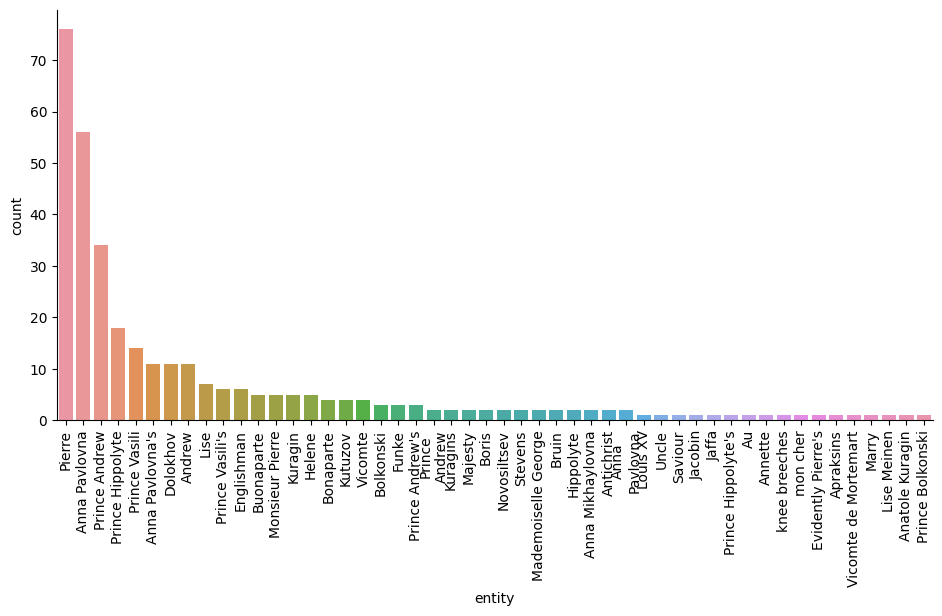

In [22]:
sns.catplot(data=entity_df.head(n=50), x='entity', y='count', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

We have a pretty accurate model of who they main characters in War and Peace are! You may notice that some entities are actually duplicates (`Anna Pavlovna` and `Anna Pavlovna's`: these could in principle be manually normalized or, more elegantly, clustered using pipelines for a task called "coreference resolution"). 

### Character time series
As a demonstration of what you can do with this, let's focus on the top 3 characters. Can we plot a time series, visualizing how many times they are mentioned in each of the 9 chapters?

In [23]:
idxs = [] # create an empty list
for t in doc: # for each token in the document
    if t.text == 'CHAPTER': # if the token is the word 'CHAPTER'
        idxs.append(t.idx) # append start index of the chapter

In [24]:
char_count_by_chapter = dict(zip(entity_df.entity.head(n=3).tolist(), # create a dictionary with the top 3 entities as keys
                                 [dict(zip(range(1,10),[0]*9)), # create a dictionary with the chapter numbers as keys
                                  dict(zip(range(1,10),[0]*9)), # and the value 0 for each chapter
                                  dict(zip(range(1,10),[0]*9))])) # there are more elegant ways to do this, with defaultdict

for e in doc.ents: # for each entity in the document
    if e.text in char_count_by_chapter.keys(): # if the entity is one of the top 3 (names in this case)
        for nr, i in enumerate(idxs): # for each chapter index
            if e.start_char < i: # if the entity starts before the chapter index
                char_count_by_chapter[e.text][nr] += 1 # add 1 to the count of that entity in that chapter
                break
            else: # if the entity starts after the chapter index
                if nr == 8: # if the chapter index is the last one
                    char_count_by_chapter[e.text][9] += 1 # add 1 to the count of that entity in the last chapter


In [25]:
dfs = []
for k,v in char_count_by_chapter.items():
    df = pd.DataFrame.from_dict(v, orient='index').reset_index().rename({'index': 'chapter',
                                                                         0: 'count'}, axis=1)
    df['character'] = k
    dfs.append(df)
char_df = pd.concat(dfs)

/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1

<Axes: xlabel='chapter', ylabel='count'>

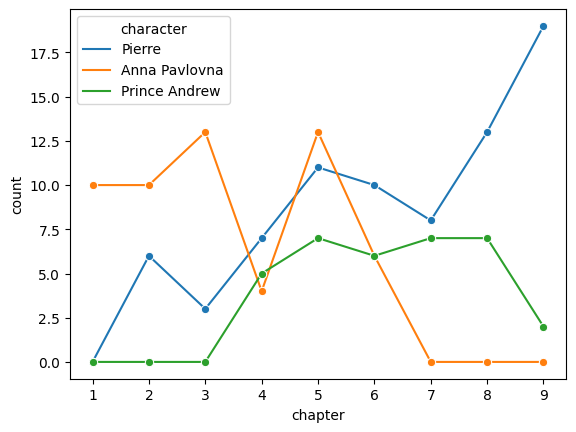

In [26]:
sns.lineplot(data=char_df, x='chapter', y='count', hue='character', marker='o')

## Word vectors
One of the attributes that spaCy models provide is easy access to word vectors. These are not based on counts, but on more sophisticated algorithms that we will look into in detail next week, but the intuition is the same as count-based vectors. Let's use this to put some of the notions we explored in our lecture into practice. First, let's take a look at some of the tokens in our text

In [27]:
for i, t in enumerate(doc[:20]):
    print(i, t.text)

0 CHAPTER
1 I
2 


3 "
4 Well
5 ,
6 Prince
7 ,
8 so
9 Genoa
10 and
11 Lucca
12 are
13 now
14 just
15 family
16 estates
17 of
18 the
19 



Let's focus on the token "family" (occurring, e.g., at index 15). We want to identify the words that are most similar to family (of those present in the text). With SpaCy, we can compute cosine similarity between vectors using in-build functionality. The following piece of code computes the similarity between "family" (the token at index 15) and "estates" (the token at index 16).

In [28]:
doc[15].similarity(doc[16]) # cosine similarity between two tokens

/var/folders/ll/fp10h_1j0d1ddcld2t3r_dpr0000gn/T/ipykernel_9526/3800344916.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  doc[15].similarity(doc[16]) # cosine similarity between two tokens


0.012883137911558151

Based on this, can you identify the 20 tokens, of those occurring in our doc, whose vectors are *most similar* to "family"? Do the results make sense?

In [29]:
# Calculate the cosine similarity between "family" and all other tokens
family_token = doc[15]
similarities = []

for token in doc:
    if token == family_token:
        continue # skip the family token
    similarity = family_token.similarity(token)
    similarities.append((token.text, similarity))

# Sort the tokens by similarity in descending order
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True) # Sorted sorts the similarities in descending order. The key=lambda x: x[1] means that the second element of the tuple is used for sorting. reverse=True means that the sorting is done in descending order.

pd.DataFrame(sorted_similarities[:20], columns=['token', 'similarity'])

/var/folders/ll/fp10h_1j0d1ddcld2t3r_dpr0000gn/T/ipykernel_9526/1950383037.py:8: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = family_token.similarity(token)


,token,similarity
0,family,1.000000
1,family,1.000000
2,family,1.000000
3,family,1.000000
4,family,1.000000
5,shirt,0.713860
6,ball,0.692136
7,infantry,0.685690
8,dress,0.651206
9,diamond,0.637127


This looks very promising: can you do the same with other words? What happens if you look at the *most dissimilar* words?

In [32]:
df

,token,similarity
0,said,-0.372918
1,turned,-0.366804
2,was,-0.363368
3,was,-0.354092
4,said,-0.347057
5,said,-0.346590
6,said,-0.344583
7,said,-0.344177
8,said,-0.340164
9,said,-0.336033


In [35]:
#What happens if you look at the *most dissimilar* words?
sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=False)

pd.DataFrame(sorted_similarities[:20], columns=['token', 'similarity'])


,token,similarity
0,said,-0.372918
1,turned,-0.366804
2,was,-0.363368
3,was,-0.354092
4,said,-0.347057
5,said,-0.346590
6,said,-0.344583
7,said,-0.344177
8,said,-0.340164
9,said,-0.336033


Finally, let's visualize some vectors. Let's sample 200 random nouns, reduce the vector dimensionality with a technique called principal component analysis, and let's visualize the resulting space.

In [36]:
random_indices = []
for i, t in enumerate(doc):
    if t.pos_ == 'NOUN':
        random_indices.append(i)
        if len(random_indices) == 200:
            break

In [37]:
pca = PCA(n_components=2)
vectors = np.vstack([doc[i].vector for i in random_indices])
reduced_vectors = pca.fit_transform(vectors) # transform into a 2d space

In [38]:
reduced_vectors

array([[ 0.4993271 ,  2.0861564 ],
       [-2.1255386 ,  2.1780455 ],
       [ 3.8997338 , -0.47125313],
       [-1.7556739 , -1.1163257 ],
       [ 4.072205  ,  1.7664315 ],
       [ 6.3088937 , -0.04829561],
       [-0.8143047 , -2.5590894 ],
       [-0.9329252 , -0.26508996],
       [-1.3472468 , -2.7062864 ],
       [-0.08594424, -1.059096  ],
       [-0.50931346,  2.025083  ],
       [-0.7175552 ,  0.22257051],
       [-0.28271016,  0.32094437],
       [ 4.2029715 ,  0.7145976 ],
       [-0.9332677 ,  1.528898  ],
       [-1.0689723 ,  0.03693434],
       [-0.5351329 , -1.6997191 ],
       [-1.9830639 , -1.1146452 ],
       [-0.7672923 ,  1.1224962 ],
       [ 3.0721917 , -1.3258785 ],
       [ 2.2790117 , -2.906272  ],
       [ 2.3725138 ,  1.8175293 ],
       [-0.53846496,  1.9450068 ],
       [ 2.0951068 , -3.3421211 ],
       [ 3.6499522 ,  0.2419596 ],
       [-0.6843879 , -1.3454523 ],
       [-1.2771575 , -0.72721195],
       [-0.43933815, -0.09406452],
       [-2.101766  ,

Now let's plot the reduced vectors in 2D space:

/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/wibe/Desktop/CogSci/NLP/NLP-AU-23/nlp_course_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


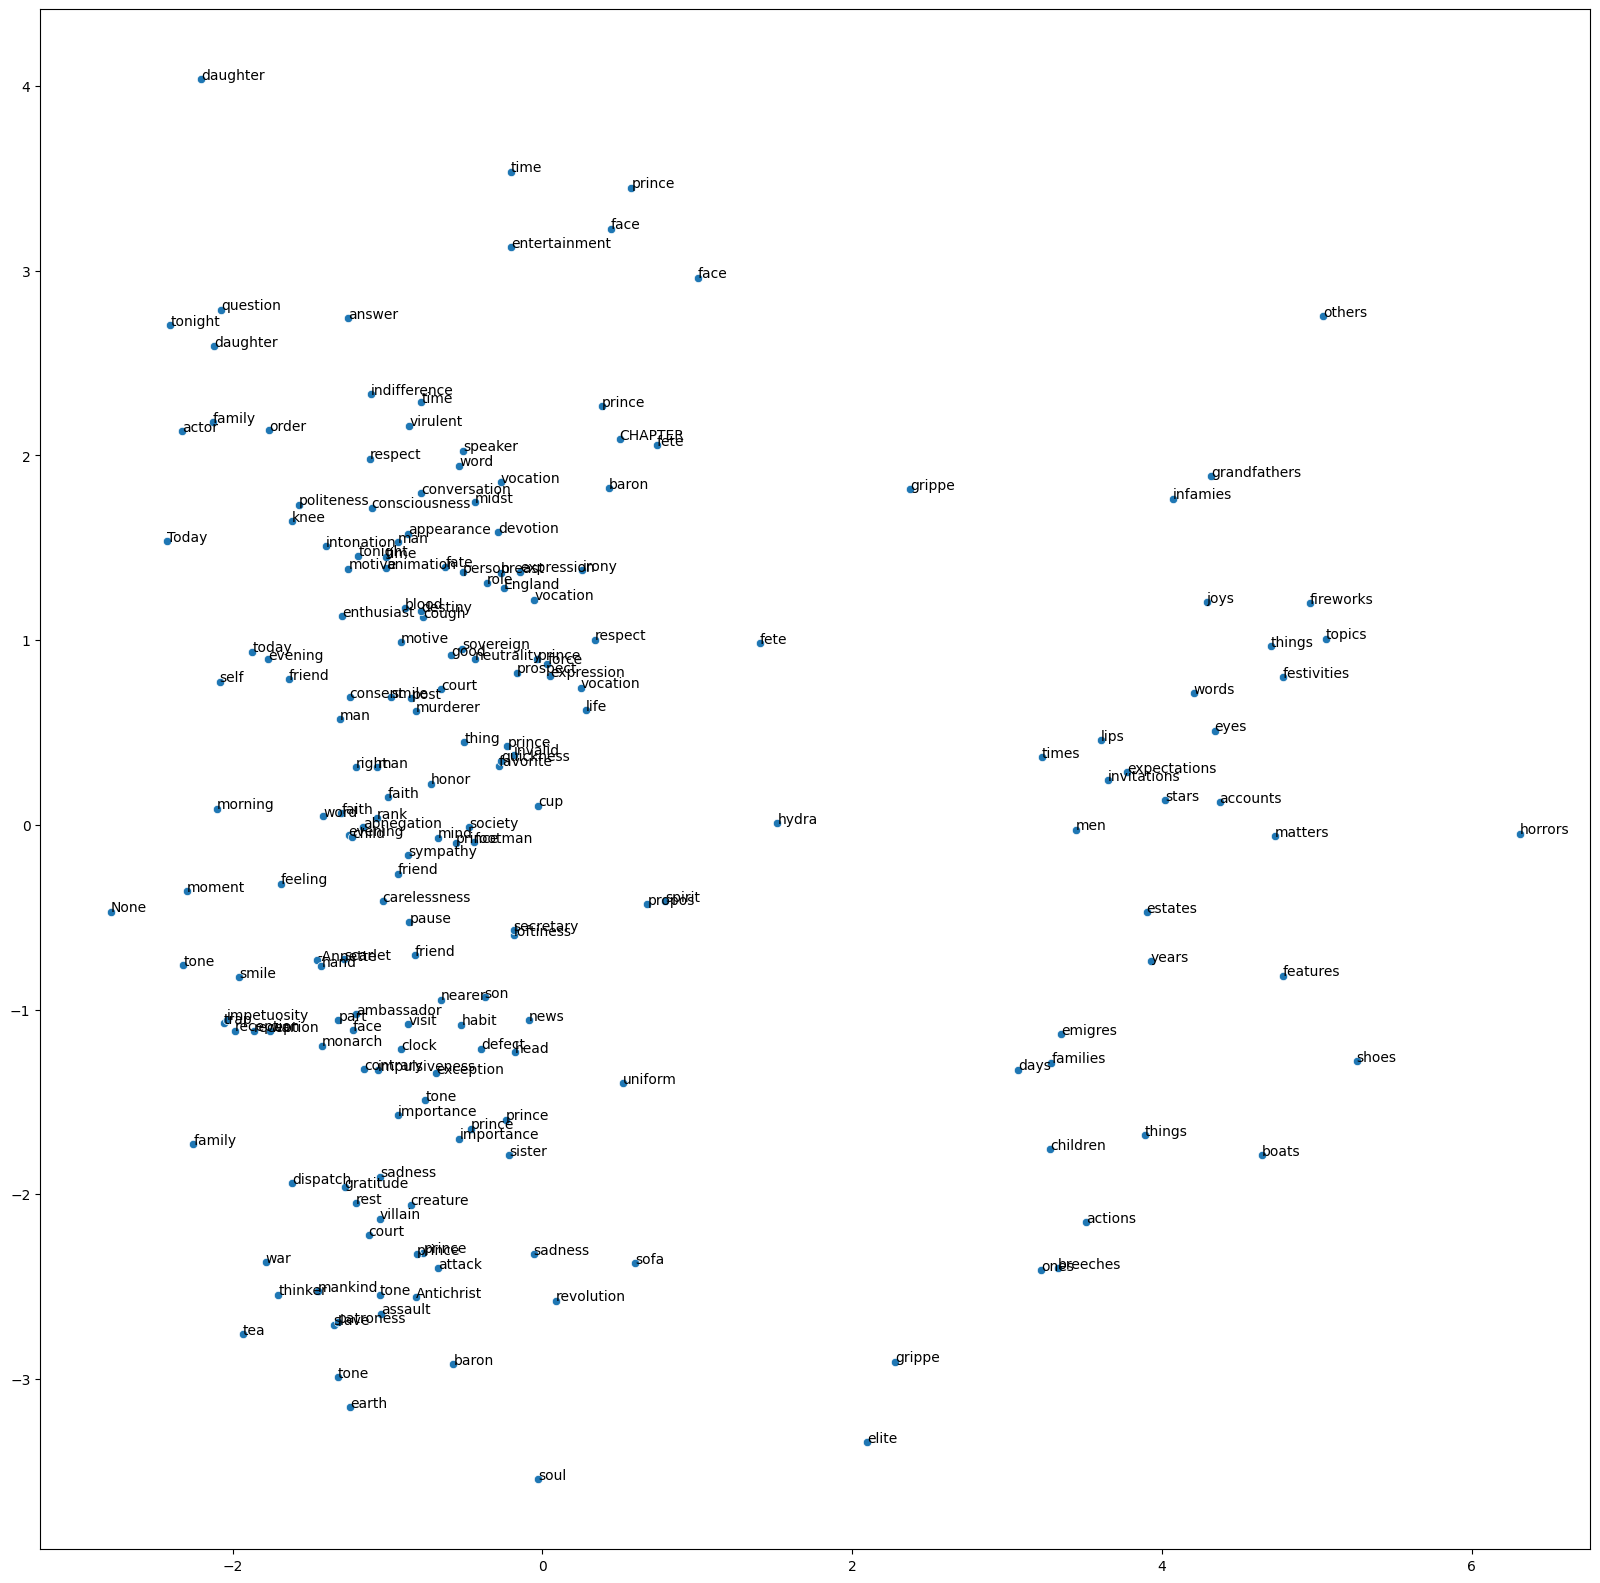

In [66]:
plt.subplots(figsize=(20,20))
sns.scatterplot(x=reduced_vectors[:200,0], y=reduced_vectors[:200,1])
for i in range(200):
    plt.text(reduced_vectors[i,0], 
             reduced_vectors[i,1], 
             doc[random_indices[i]])

Do you notice anything promising in terms of relations between vectors?

Note that you can also use `scikit-learn` to compute `euclidean_distances` and `cosine_similarity`, see: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise. These functions require a matrix as input, and they compute all pairwise similarities between rows of the matrix.

**Optional**: can you implement your own versions functions to compute euclidean distance and cosine similarity? Look at the formulas from Lecture 2, and use `spaCy` or `scikit-learn` functions to check that they are correct. We will experiment more with word vectors next week.

## Task
In the shared data drive on UCloud, there is a folder called `data`, where you can find a file called `News_Category_Dataset_v2.json`. This is taken from [this Kaggle exercise](https://www.kaggle.com/datasets/rmisra/news-category-dataset) and comprises some 200k news headlines from [HuffPost](https://www.huffpost.com/). The data is a json lines format, with one JSON object per row. You can load this data into pandas in the following way:
```
data = pd.read_json(filepath, lines=True)
```
Select a couple of sub-categories of news data and use spaCy to find the relative frequency per **10k words** of each of the following word classes - NOUN, VERB, ADJECTIVE, ADVERB (in the headlines).
Save the results as a CSV file (again using pandas).
Are there any differences in the distributions?

In [39]:
import os
filepath = os.path.join('..', 'data', 'data_large', 'News_Category_Dataset_v2.json')

data = pd.read_json(filepath, lines=True)

In [41]:
# Function to calculate the frequency of word classes in headlines per 10k words
def calculate_word_class_frequency(headline):
    doc = nlp(headline)
    
    # Counters for word classes
    noun_count = 0
    verb_count = 0
    adj_count = 0
    adv_count = 0
    total_words = len(doc)
    
    for token in doc:
        if token.pos_ == "NOUN":
            noun_count += 1
        elif token.pos_ == "VERB":
            verb_count += 1
        elif token.pos_ == "ADJ":
            adj_count += 1
        elif token.pos_ == "ADV":
            adv_count += 1
    
    # Calculate relative frequencies per 10k words
    total_words_per_10k = (total_words / 10)  # Dividing by 10 to get per 10k words
    noun_freq = (noun_count / total_words_per_10k)
    verb_freq = (verb_count / total_words_per_10k)
    adj_freq = (adj_count / total_words_per_10k)
    adv_freq = (adv_count / total_words_per_10k)
    
    return noun_freq, verb_freq, adj_freq, adv_freq

In [ ]:
calculate_word_class_frequency(data["headline"][1:3])

In [58]:
data["headline"][1:3]

1    Will Smith Joins Diplo And Nicky Jam For The 2...
2      Hugh Grant Marries For The First Time At Age 57
Name: headline, dtype: object

In [ ]:
# Calculating the relative frequency of nouns, verbs, adjectives, and adverbs
def calculate_relative_frequency(doc, files):
        doc=nlp(headline)
    # Calculating the relative frequency of nouns, verbs, adjectives, and adverbs
        num_words = len(doc) # number of words in the document
        num_nouns = len([token for token in doc if token.pos_ == 'NOUN']) # token for token means that we are looping over each token in the document
        num_verbs = len([token for token in doc if token.pos_ == 'VERB']) # number of verbs in the document
        num_adjs = len([token for token in doc if token.pos_ == 'ADJ']) # number of adjectives in the document
        num_adv = len([token for token in doc if token.pos_ == 'ADV']) # number of adverbs in the document
        freq_nouns = num_nouns / num_words * 10000
        freq_verbs = num_verbs / num_words * 10000
        freq_adjs = num_adjs / num_words * 10000
        freq_adv = num_adv / num_words * 10000
        
        # Calculate the number of unique words associated with each PERSON, LOC, and ORG entity
        num_person_words = len(set([word for word in doc if word.ent_type_ == 'PERSON']))
        num_loc_words = len(set([word for word in doc if word.ent_type_ == 'LOC']))
        num_org_words = len(set([word for word in doc if word.ent_type_ == 'ORG']))
        
        # Add the results for the file to the results list
        results = []
        results.append([files, freq_nouns, freq_verbs, freq_adjs, freq_adv, num_person_words, num_loc_words, num_org_words])

        return results